In [12]:
from pyspark.sql import SparkSession
spark=(SparkSession.builder.appName("Capstone").config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083").enableHiveSupport().getOrCreate())

In [13]:
spark

### Q1 A list showing employee number, last name, first name, sex, and salary for each employee

In [17]:
spark.sql("select e.emp_no,e.last_name,e.first_name,e.sex,s.salary from anabig114243.employees e join anabig114243.salaries s on e.emp_no=s.emp_no ").show()

+------+-----------+----------+---+------+
|emp_no|  last_name|first_name|sex|salary|
+------+-----------+----------+---+------+
| 10001|    Facello|    Georgi|  M| 60117|
| 10002|     Simmel|   Bezalel|  F| 65828|
| 10003|    Bamford|     Parto|  M| 40006|
| 10004|    Koblick| Chirstian|  M| 40054|
| 10005|   Maliniak|   Kyoichi|  M| 78228|
| 10006|    Preusig|    Anneke|  F| 40000|
| 10007|  Zielinski|   Tzvetan|  F| 56724|
| 10008|   Kalloufi|    Saniya|  M| 46671|
| 10009|       Peac|    Sumant|  F| 60929|
| 10010|   Piveteau| Duangkaew|  F| 72488|
| 10011|      Sluis|      Mary|  F| 42365|
| 10012|  Bridgland|  Patricio|  M| 40000|
| 10013|     Terkki| Eberhardt|  M| 40000|
| 10014|      Genin|     Berni|  M| 46168|
| 10015|  Nooteboom|  Guoxiang|  M| 40000|
| 10016|Cappelletti|  Kazuhito|  M| 70889|
| 10017|  Bouloucos| Cristinel|  F| 71380|
| 10018|       Peha|  Kazuhide|  F| 55881|
| 10019|    Haddadi|   Lillian|  M| 44276|
| 10020|    Warwick|    Mayuko|  M| 40000|
+------+---

### Q2 A list showing first name, last name, and hire date for employees who were hired in 1986.

In [18]:

spark.sql("select first_name,last_name,substr(hire_date,7,10)as hire_date from anabig114243.employees where substr(hire_date,7,10)='1986'").show() 


+----------+------------+---------+
|first_name|   last_name|hire_date|
+----------+------------+---------+
|    Georgi|     Facello|     1986|
|     Parto|     Bamford|     1986|
| Chirstian|     Koblick|     1986|
|    Sanjiv|    Zschoche|     1986|
|      Kwee|    Schusler|     1986|
|   Kshitij|        Gils|     1986|
|  Zhongwei|       Rosen|     1986|
|   Xinglin|     Eugenio|     1986|
| Sudharsan|Flasterstein|     1986|
|    Kendra|     Hofting|     1986|
|    Hilari|      Morton|     1986|
|     Akemi|       Birch|     1986|
|    Lunjin|      Giveon|     1986|
|    Xuejia|      Ullian|     1986|
|   Chikara|    Rissland|     1986|
|  Domenick|    Peltason|     1986|
|    Zissis|    Pintelas|     1986|
|     Perry|   Shimshoni|     1986|
|  Kazuhito| Encarnacion|     1986|
|   Xiadong|       Perry|     1986|
+----------+------------+---------+
only showing top 20 rows



### Q3 A list showing the manager of each department with the following information: department number, department name,the manager's employee number, last name, first name.

In [21]:
spark.sql("select d.dept_name,d.dept_no,dm.emp_no,ee.last_name,ee.first_name,tt.title from anabig114243.departments d join anabig114243.dept_managers dm on d.dept_no=dm.dept_no join anabig114243.employees ee on dm.emp_no=ee.emp_no join anabig114243.titles tt on ee.emp_titles_id=tt.title_id group by d.dept_name,d.dept_no,dm.emp_no,ee.last_name,ee.first_name,tt.title ").show()

+------------------+-------+------+------------+-----------+-------+
|         dept_name|dept_no|emp_no|   last_name| first_name|  title|
+------------------+-------+------+------------+-----------+-------+
|Quality Management|   d006|110854|       Pesch|       Dung|Manager|
|          Research|   d008|111534|      Kambil|     Hilary|Manager|
|Quality Management|   d006|110800|     Quadeer|     Sanjoy|Manager|
|        Production|   d004|110344|       Cools|     Rosine|Manager|
|         Marketing|   d001|110039|    Minakawa|   Vishwani|Manager|
|  Customer Service|   d009|111939|     Weedman|    Yuchang|Manager|
|         Marketing|   d001|110022|  Markovitch|  Margareta|Manager|
|        Production|   d004|110303|     Wegerle|  Krassimir|Manager|
|        Production|   d004|110386|      Kieras|       Shem|Manager|
|Quality Management|   d006|110765|     Hofmeyr|     Rutger|Manager|
|           Finance|   d002|110085|       Alpin|       Ebru|Manager|
|   Human Resources|   d003|110228

### Q4 select d.dept_name,ee.emp_no,ee.last_name,ee.first_name from employees ee join dept_managers dm on ee.emp_no=dm.emp_no join departments d on d.dept_no=dm.dept_no

In [22]:
spark.sql("select d.dept_name,ee.emp_no,ee.last_name,ee.first_name from anabig114243.employees ee join anabig114243.dept_managers dm on ee.emp_no=dm.emp_no join anabig114243.departments d on d.dept_no=dm.dept_no").show()

+------------------+------+------------+-----------+
|         dept_name|emp_no|   last_name| first_name|
+------------------+------+------------+-----------+
|         Marketing|110022|  Markovitch|  Margareta|
|         Marketing|110039|    Minakawa|   Vishwani|
|           Finance|110085|       Alpin|       Ebru|
|           Finance|110114|  Legleitner|      Isamu|
|   Human Resources|110183|Ossenbruggen|    Shirish|
|   Human Resources|110228|     Sigstam|    Karsten|
|        Production|110303|     Wegerle|  Krassimir|
|        Production|110344|       Cools|     Rosine|
|        Production|110386|      Kieras|       Shem|
|        Production|110420|    Ghazalie|      Oscar|
|       development|110511|    Hagimont|   DeForest|
|       development|110567|    DasSarma|       Leon|
|Quality Management|110725|     Onuegbe|  Peternela|
|Quality Management|110765|     Hofmeyr|     Rutger|
|Quality Management|110800|     Quadeer|     Sanjoy|
|Quality Management|110854|       Pesch|      

### Q5 A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

In [24]:
spark.sql("select first_name,last_name, sex from anabig114243.employees where upper(first_name) like 'HERCULES%' and upper(last_name) like 'B%' ").show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|   Benzmuller|  M|
|  Hercules|      Brendel|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baer|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|      Basagni|  M|
|  Hercules|        Biran|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Bisiani|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|        Biron|  F|
|  Hercules|      Buchter|  M|
|  Hercules|         Bain|  F|
|  Hercules|         Bahr|  M|
|  Hercules|         Baak|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Berstel|  F|
+----------+-------------+---+



### Q6  A list showing all employees in the Sales department, including their employee number, last name, first name, and department name.

In [25]:
spark.sql("select d.dept_name,ee.emp_no,ee.last_name,ee.first_name,dept_name from anabig114243.employees ee join anabig114243.dept_managers dm on ee.emp_no=dm.emp_no join anabig114243.departments d on d.dept_no=dm.dept_no where upper(d.dept_name) like 'SALES%'").show()

+---------+------+---------+-----------+---------+
|dept_name|emp_no|last_name| first_name|dept_name|
+---------+------+---------+-----------+---------+
|    Sales|111035|Kaelbling|Przemyslawa|    Sales|
|    Sales|111133|    Zhang|      Hauke|    Sales|
+---------+------+---------+-----------+---------+



### Q7  A list showing all employees in the Sales and Development departments, including their employee number, last name,first name, and department name.

In [26]:
spark.sql("select d.dept_name,ee.emp_no,ee.last_name,ee.first_name from anabig114243.employees ee join anabig114243.dept_managers dm on ee.emp_no=dm.emp_no join anabig114243.departments d on d.dept_no=dm.dept_no where upper(d.dept_name) like 'SALES%' or upper(d.dept_name) like 'DEVELOPMENT%'").show()

+-----------+------+---------+-----------+
|  dept_name|emp_no|last_name| first_name|
+-----------+------+---------+-----------+
|development|110511| Hagimont|   DeForest|
|development|110567| DasSarma|       Leon|
|      Sales|111035|Kaelbling|Przemyslawa|
|      Sales|111133|    Zhang|      Hauke|
+-----------+------+---------+-----------+



### Q8  select last_name,count(last_name)as counts from employees group by last_name having counts>1 order by counts desc 

In [27]:
 spark.sql("select last_name,count(last_name)as counts from anabig114243.employees group by last_name having counts>1 order by counts desc").show()

+-----------+------+
|  last_name|counts|
+-----------+------+
|       Baba|   226|
|     Gelosh|   223|
|      Coorg|   223|
|    Sudbeck|   222|
|     Farris|   222|
|     Adachi|   221|
|     Osgood|   220|
|     Masada|   218|
|     Neiman|   218|
|    Mandell|   218|
|Boudaillier|   217|
|    Wendorf|   217|
|     Pettis|   216|
|   Cummings|   216|
|     Mahnke|   216|
|    Solares|   216|
|     Emmart|   215|
|    Kulisch|   215|
|   Birjandi|   215|
| Maksimenko|   215|
+-----------+------+
only showing top 20 rows



### Q9 Histogram to show the salary distribution among the employees 

In [36]:
var1=spark.sql("select salary,emp_no from anabig114243.salaries group by salary,emp_no")
var2=var1.toPandas()


In [33]:
import matplotlib.pyplot as plt

(array([1.51743e+05, 5.37790e+04, 4.10980e+04, 2.73130e+04, 1.55650e+04,
        7.20900e+03, 2.48700e+03, 6.69000e+02, 1.43000e+02, 1.80000e+01]),
 array([ 40000. ,  48949.2,  57898.4,  66847.6,  75796.8,  84746. ,
         93695.2, 102644.4, 111593.6, 120542.8, 129492. ]),
 <a list of 10 Patch objects>)

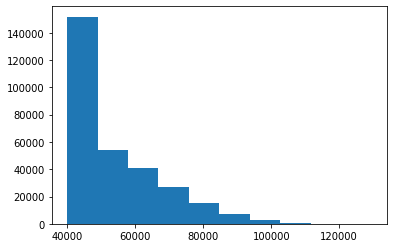

In [35]:
plt.hist(var2['salary'])

### Q10 Bar graph to show the Average salary per title (designation)

In [45]:
var3=spark.sql("select tt.title,round(avg(s.salary)) as sal from anabig114243.salaries s join anabig114243.employees ee on s.emp_no=ee.emp_no join titles tt on ee.emp_titles_id=tt.title_id group by tt.title")
var4=var3.toPandas()

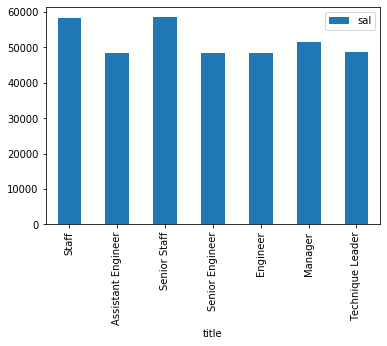

In [46]:
var4.plot.bar(x='title', y=('sal')) 